## A/B Testing on Clicks and Views
---

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from helpers import print_group_stats, plot_histograms

In [2]:
# Load and split data
data = pd.read_csv('data/ab_test_data.csv')

control = data[data['group'] == 'control']
test = data[data['group'] == 'test']

print(f"Control Group Size = {len(control)}")
print(f"Test Group Size = {len(test)}")

Control Group Size = 60000
Test Group Size = 60000


In [3]:
# Calculate stats
for name, grp in zip(["Control", "Test"], [control, test]):
    print(f"--{name}--")
    print_group_stats(grp)
    print('')

--Control--
Total Clicks = 10303.0
Total Views = 297144.0
Avg views per user = 4.9524
Clicks per user = 0.17171666666666666
CTR = 3.4673424332983336%
----

--Test--
Total Clicks = 11620.0
Total Views = 301785.0
Avg views per user = 5.02975
Clicks per user = 0.19366666666666665
CTR = 3.8504233146113953%
----



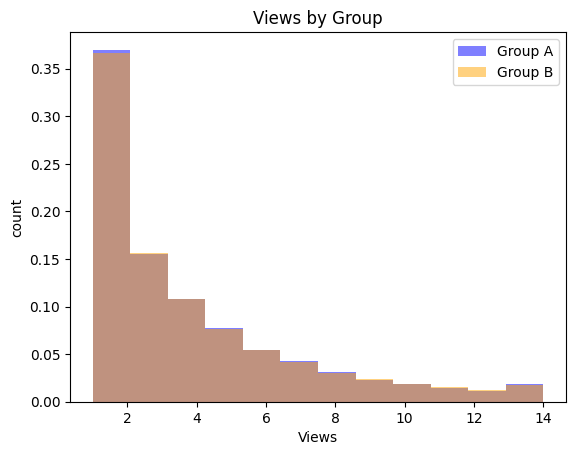

In [4]:
metric = 'views' # choose either clicks or views
plot_histograms(control[control[metric] < 15][metric], test[test[metric] < 15][metric], density=True, bins=12)

Minimal differences and a lot of overlap in the views histograms for both groups

In [5]:
# Conduct a two-tailed t-test
ts, pv = ttest_ind(control['clicks'], test['clicks'], equal_var=False)

print(f"T-statistic: {ts:.3f}")
print(f"P-value: {pv:.8f}")
if pv < 0.05:
    print("Result IS statistically significant")
else:
    print("Result is NOT statistically significant")

T-statistic: -8.048
P-value: 0.00000000
Result IS statistically significant


### Results:
---

With a non-zero t-stat and a p-value of nearly zero, the findings can be seen as statistically significant. This means there is a clear difference between the treatment and control groups that is not due to random chance. This can be seen looking at the CTR where the test groups is higher at 3.8% compared with the control around 3.4%.